Load the saved results of the best and worst cases + Plot the predictions next to the truth data for each case and by density

In [1]:
import matplotlib.pyplot as plt
import torch
import os
import skimage.io
import json
from glob import glob
import numpy as np

In [3]:
def get_mesh(num_pixels):
    x = np.linspace(0,num_pixels-1,num_pixels)
    y = np.linspace(0,num_pixels-1,num_pixels)
    X, Y = np.meshgrid(x,y)
    return X,Y

def plot_cases(category, iou_type):
    # iou type could be 'low','medium', 'high', 'overall'
    # category could be 'best' or 'low'
    save_dir = os.path.join(os.getcwd(), f'test_results/{category}/{iou_type}/')
    case_dirs = [os.path.join(save_dir, case) for case in os.listdir(save_dir)]
    
    fig, ax = plt.subplots(10, 4, figsize=(20, 50))
    ax = ax.ravel()
    
    colors = ['red', 'orange', 'yellow']
    labels = ['high', 'medium', 'light']

    for i, case_dir in enumerate(case_dirs):
        # Load predictions and fn_info
        preds = skimage.io.imread(os.path.join(case_dir, 'preds.tif'))
        with open(os.path.join(case_dir, 'fn_info.json'), 'r') as f:
            fn_info = json.load(f)
        
        iou_score = fn_info['iou_score']; truth_fp = fn_info['truth_fp']
        # print(truth_fp)

        # Get the filename from truth_fp and load the matching RGB and truth data
        fn = os.path.basename(truth_fp)
        # print(fn)
        data_loc = '/scratch1/RDARCH/rda-ghpcs/Rey.Koki/SmokeViz/'
        data_fn = glob(data_loc + "data/*/*/" + fn)[0]
        truth_fn = glob(data_loc + "truth/*/*/" + fn)[0]
        # print(fn, data_fn, truth_fn)
        RGB = skimage.io.imread(data_fn, plugin='tifffile')
        truths = skimage.io.imread(truth_fn, plugin='tifffile')

        # Plot the RGB image on both panels (left for truth, right for prediction)
        ax[2 * i].imshow(RGB)
        ax[2 * i + 1].imshow(RGB)

        num_pixels = RGB.shape[1]
        X, Y = get_mesh(num_pixels)
        for idx in reversed(range(3)):
            ax[2 * i].contour(X, Y, truths[:, :, idx], levels=[.99], colors=[colors[idx]])

        for idx in reversed(range(3)):
            ax[2 * i + 1].contour(X, Y, preds[:, :, idx], levels=[.99], colors=[colors[idx]])

        # ax[2 * i].set_title(f"HMS\nIoU {iou_type.capitalize()}: {iou_score}", fontsize=10)
        ax[2 * i + 1].set_title(f"Model Prediction\n {iou_type}_iou: {iou_score}", fontsize=10)

        # ax[2 * i].axis('off')
        # ax[2 * i + 1].axis('off')

    plt.tight_layout(pad=2)
    plt.show()

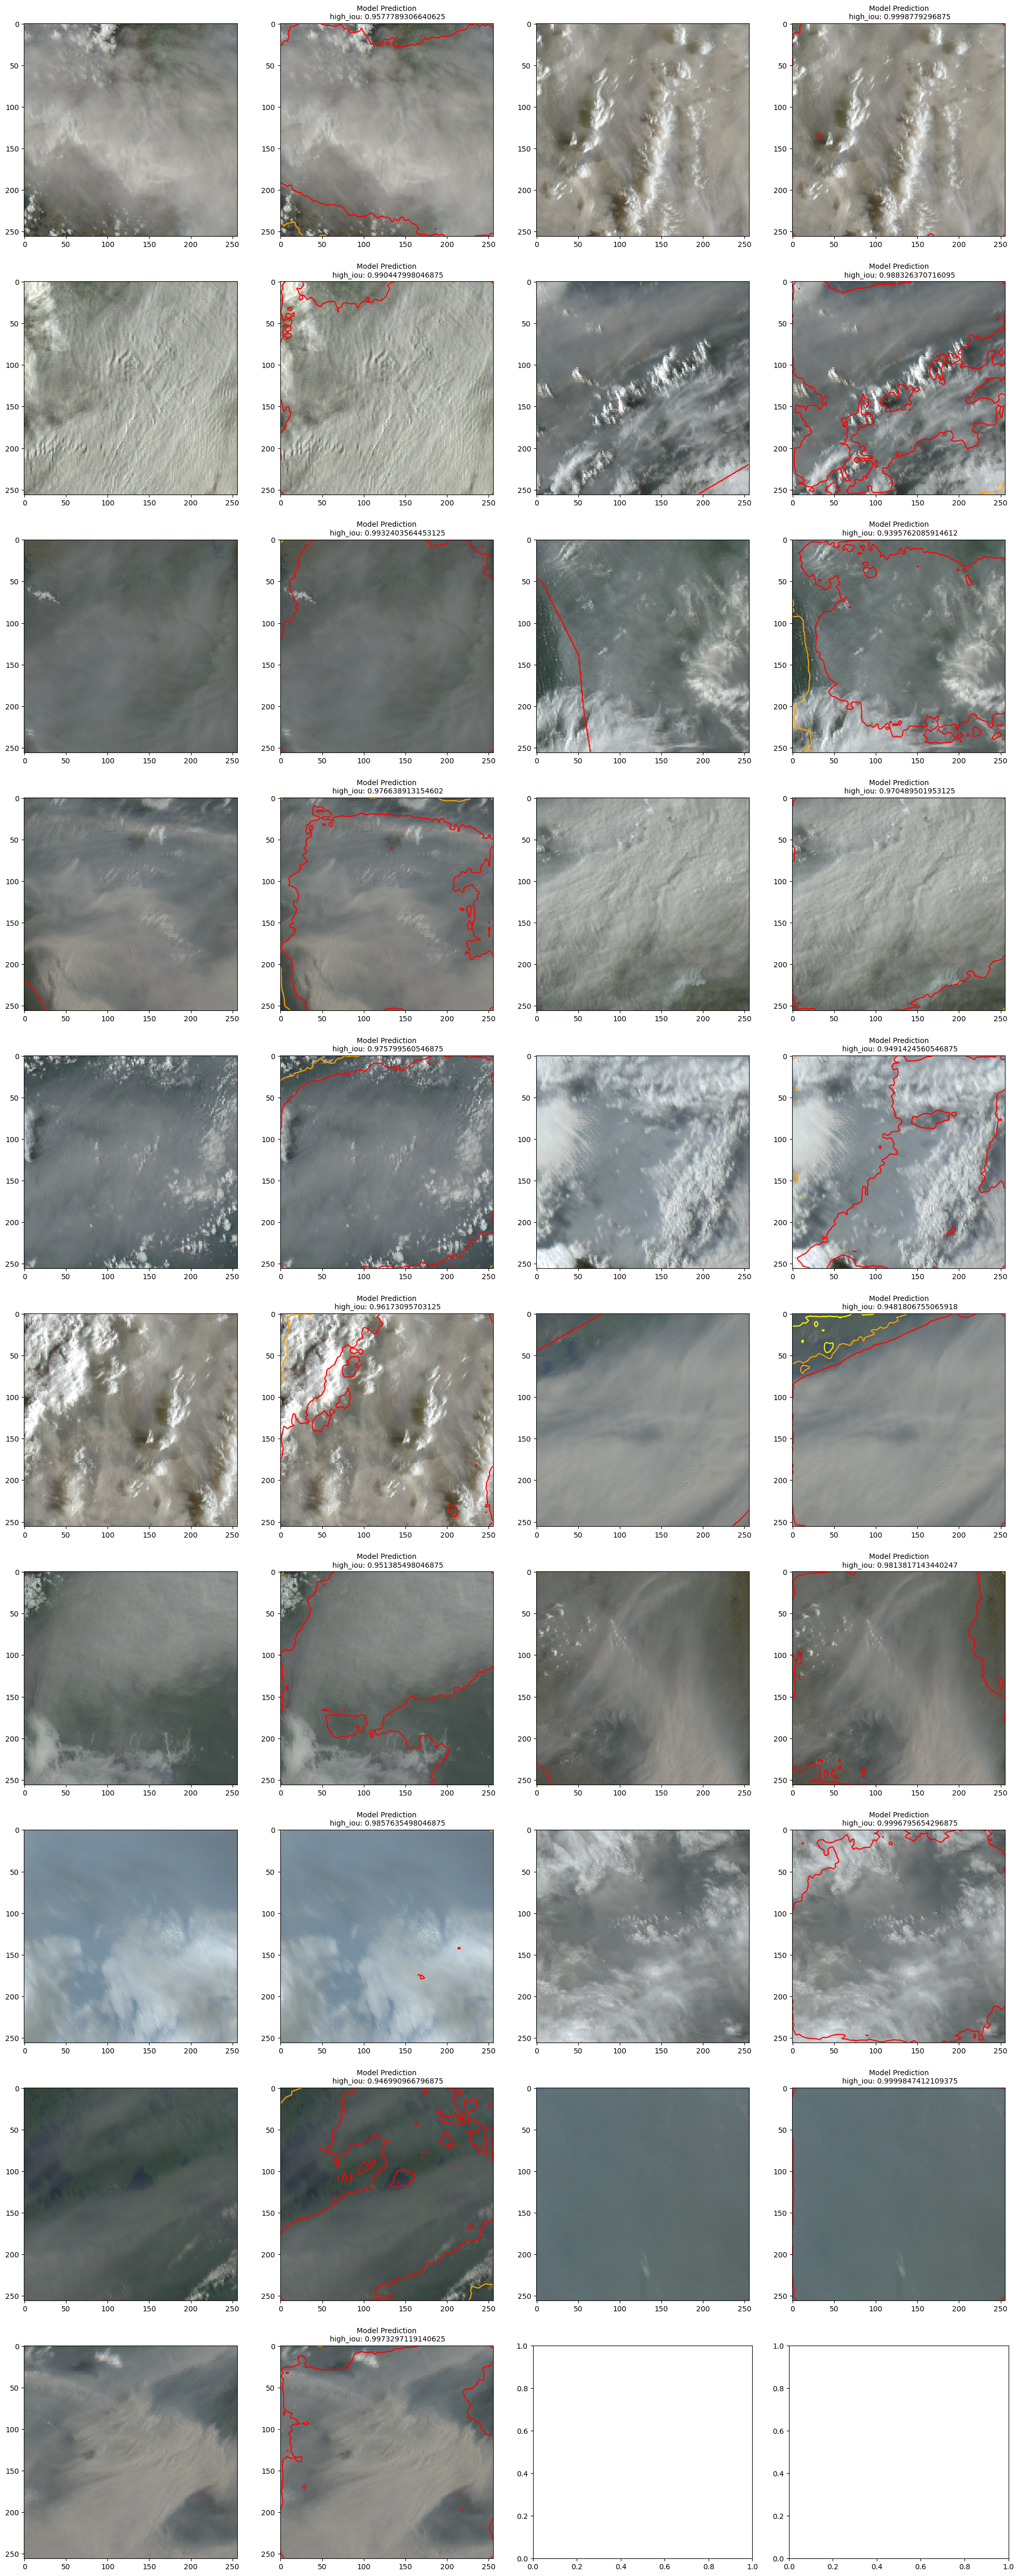

In [4]:
plot_cases('best', 'high')

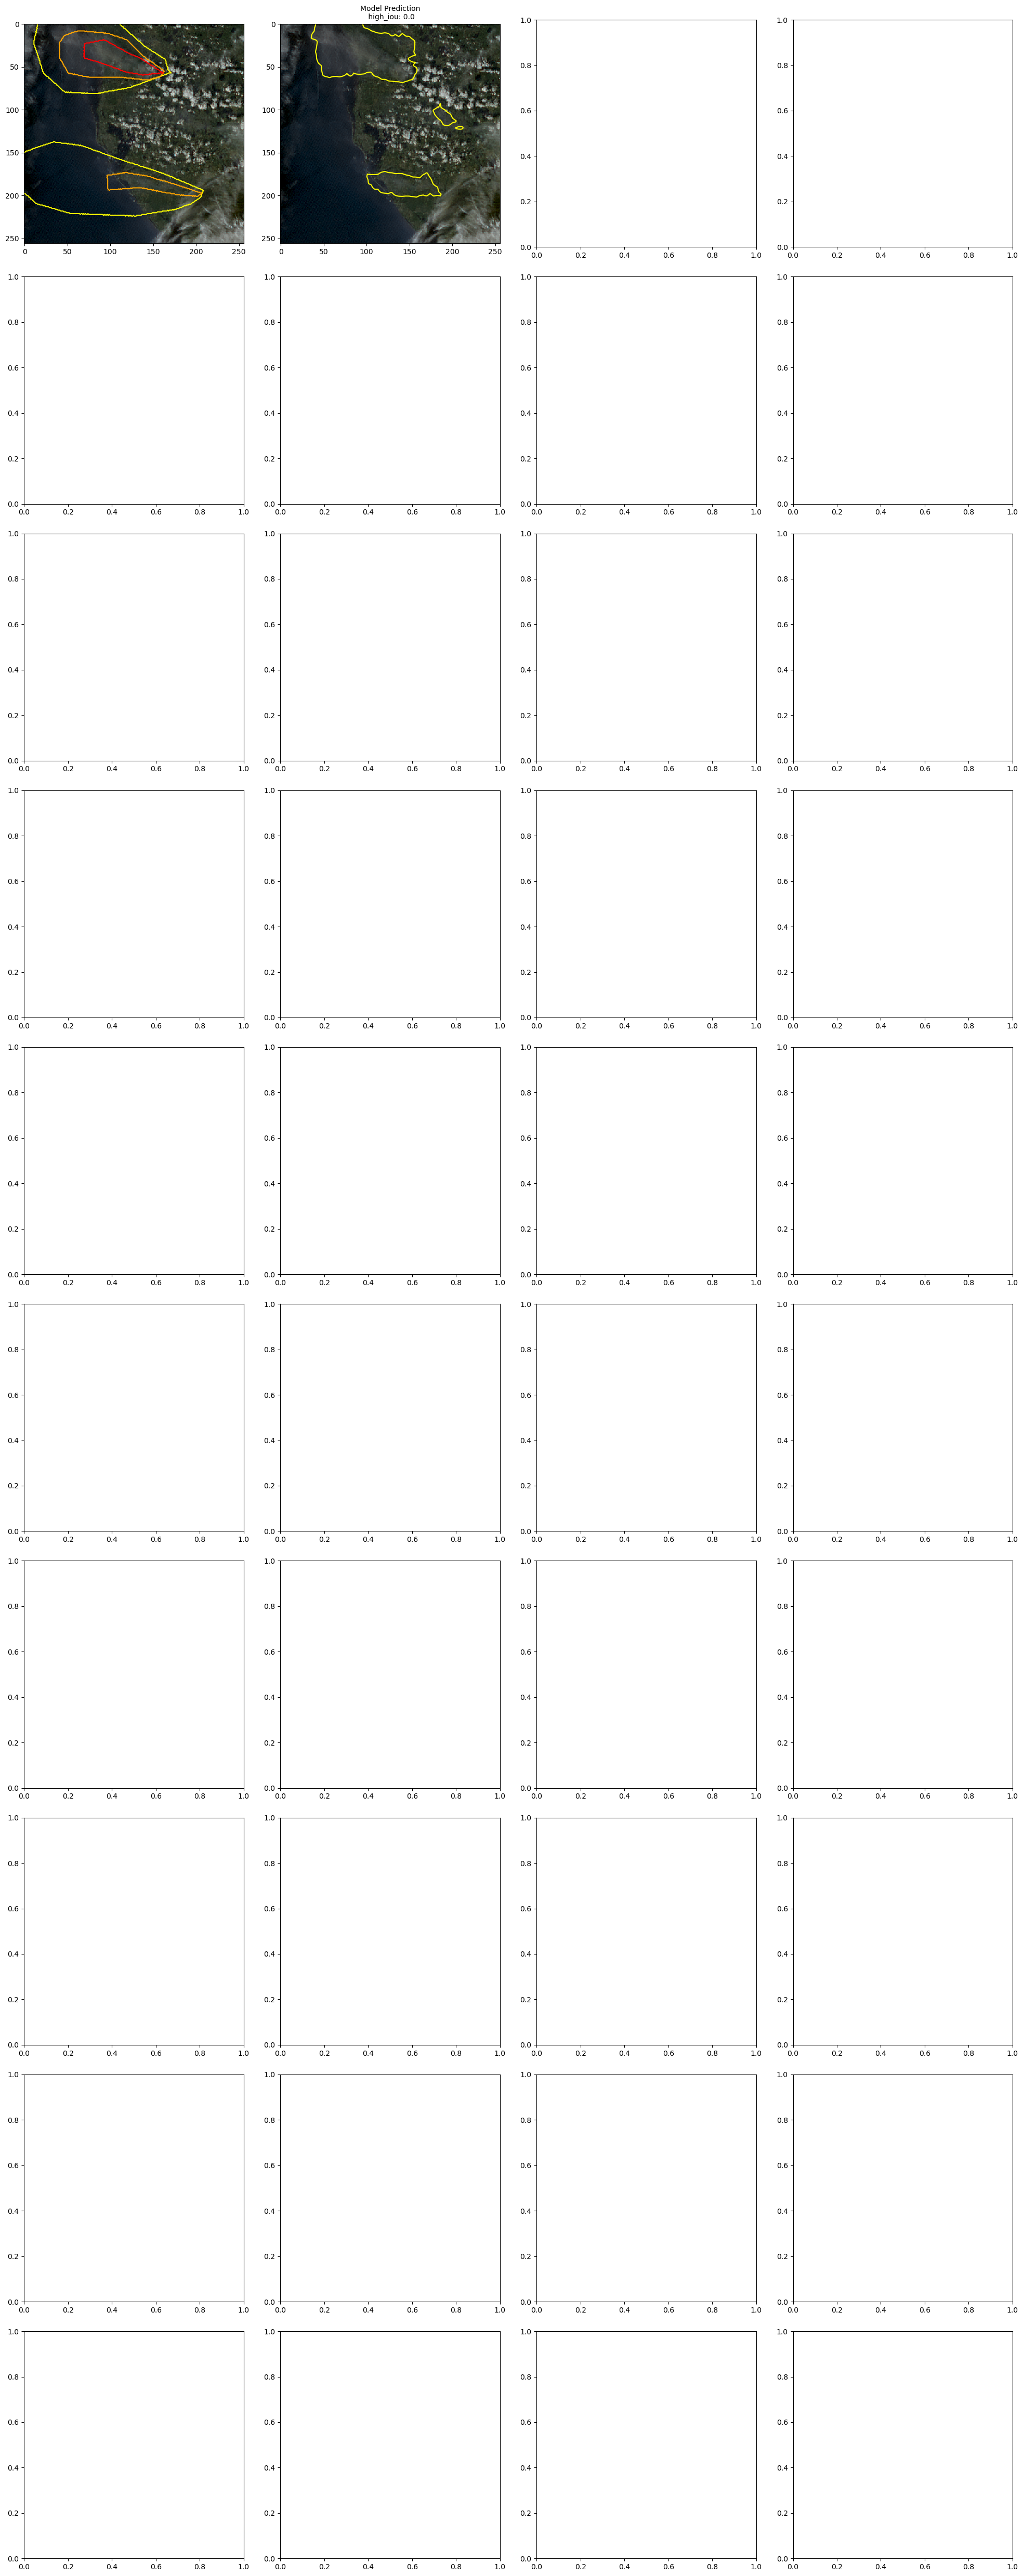

In [5]:
plot_cases('worst', 'high')

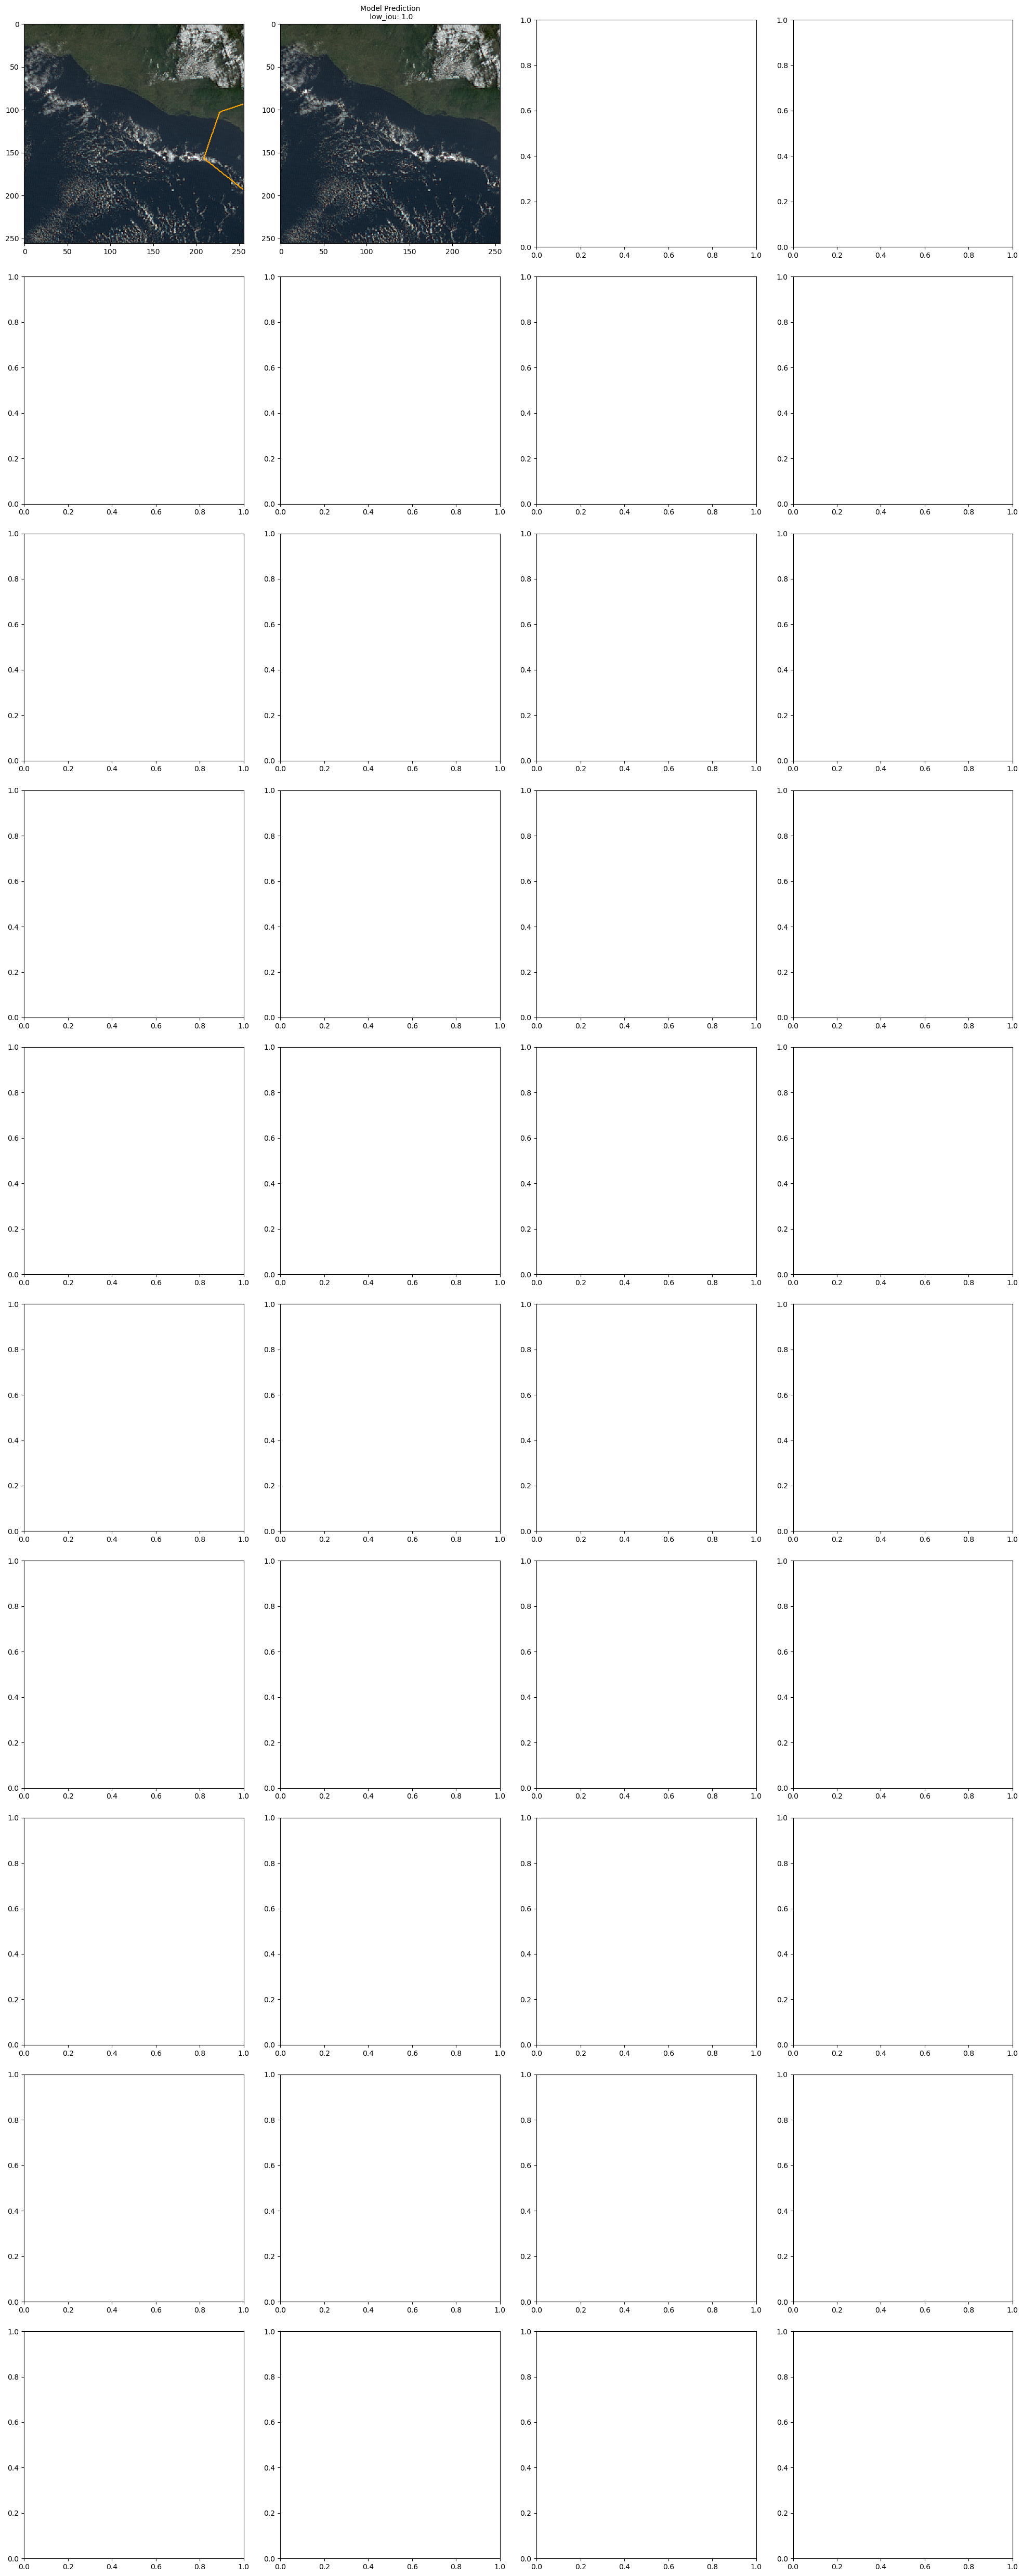

In [7]:
plot_cases('best', 'low')

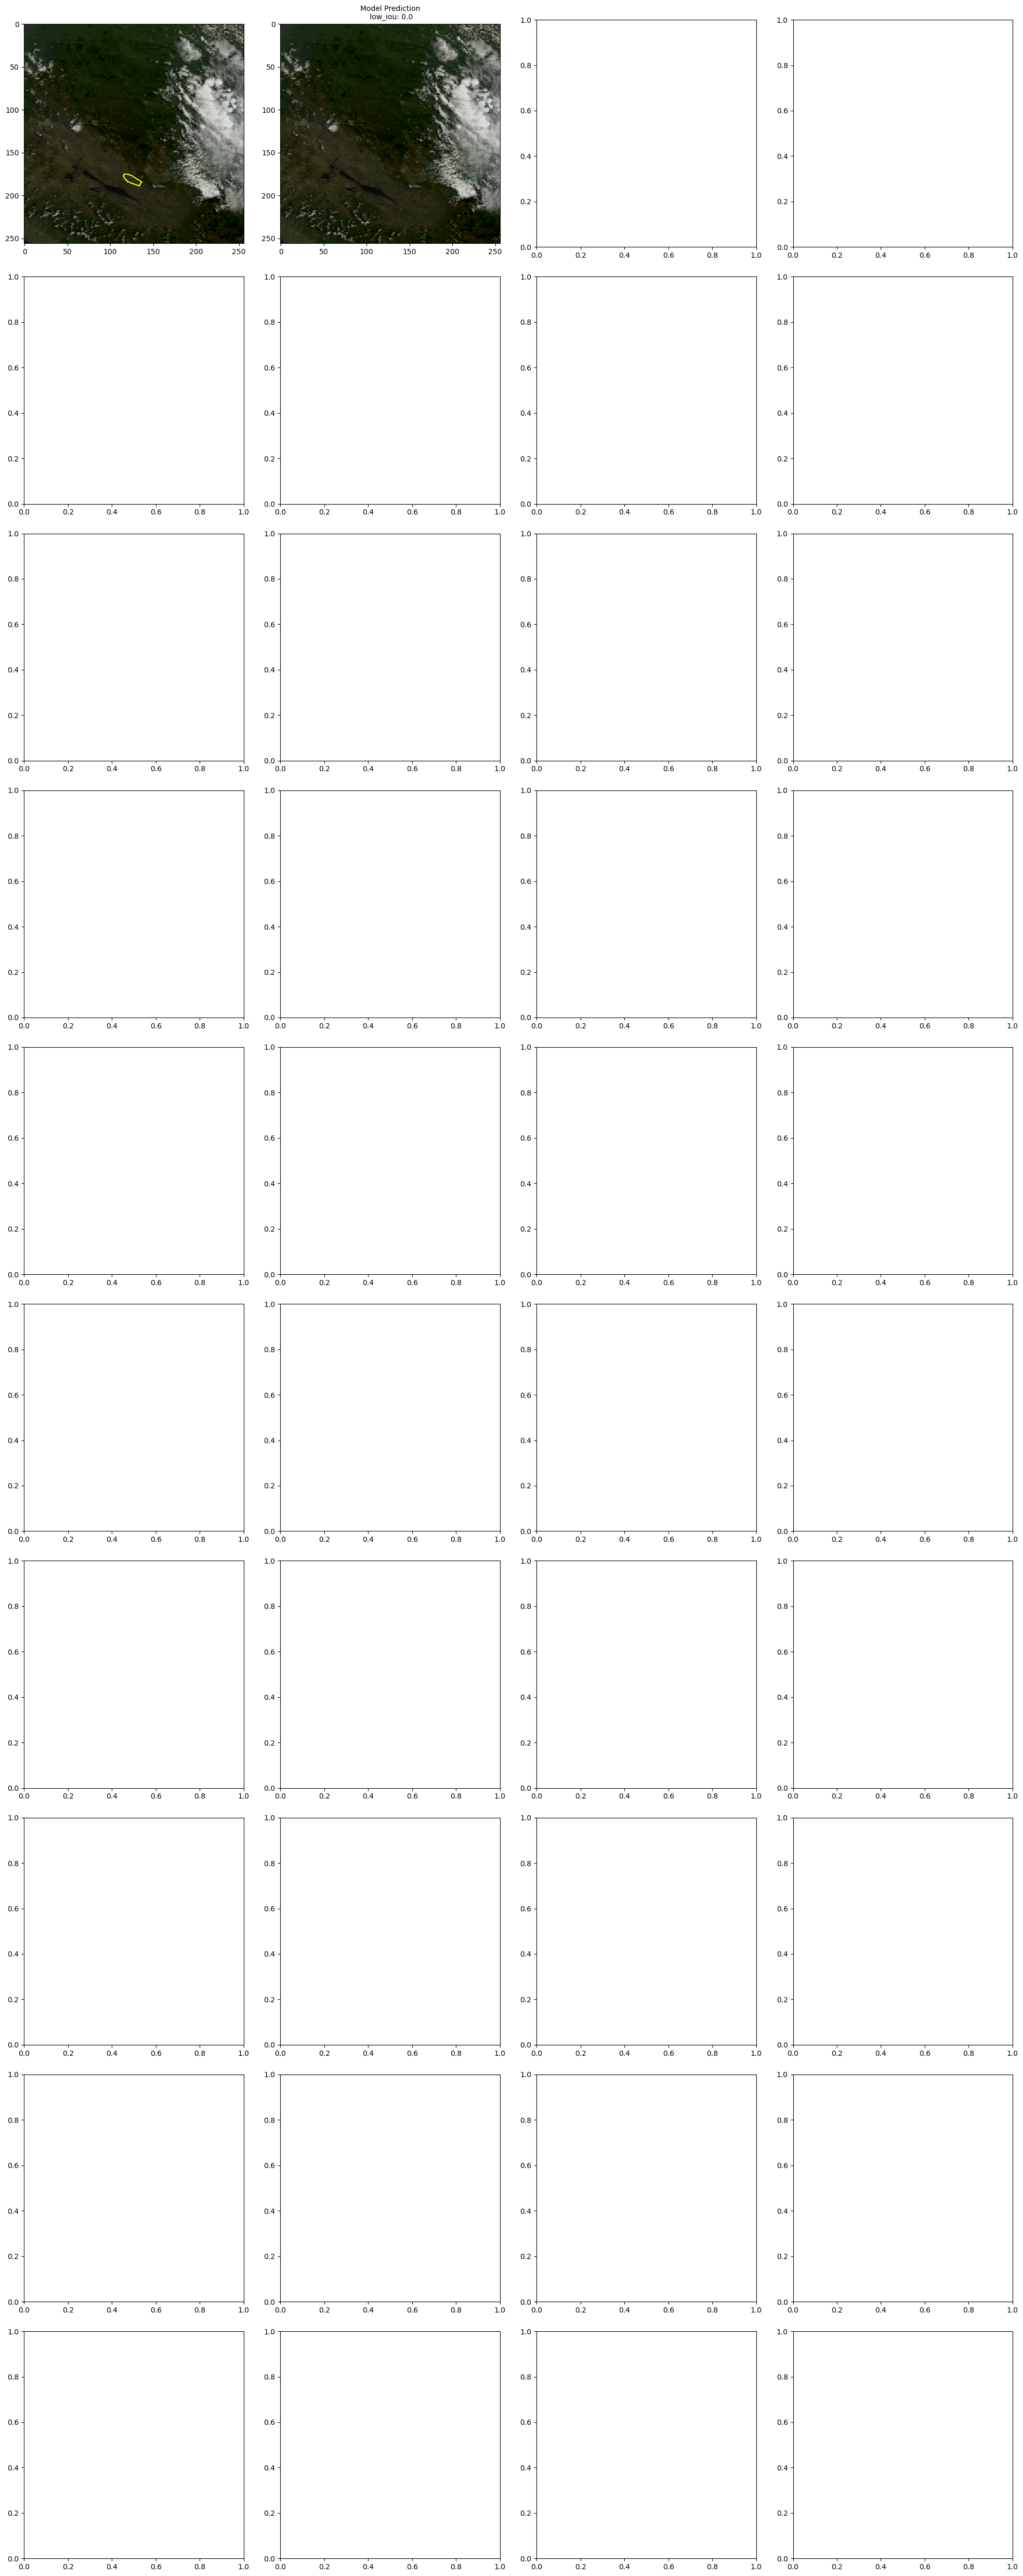

In [6]:
plot_cases('worst', 'low')